PANDAS  - Pivot Tables

using Titanic dataset

In [1]:
# A pivot table takes a simple column-wise data as input
# and groups entries into a two-dimensional table that provides a multi-dimensional summarisation of the data.

# The difference between pivot tables and GroupBy, is that pivot tables 
# are multidimensional version of GroupBy aggregation.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# we are going to use Titanic dataset
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# how many passengers were on the boat?
len(titanic)

891

In [6]:
titanic.shape

(891, 15)

In [7]:
# how many people survived?
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
sum(titanic["survived"]==1)

342

In [9]:
# from which cities did they embark?
set(titanic["embark_town"])

{nan, 'Queenstown', 'Cherbourg', 'Southampton'}

In [10]:
# or using .column notation:
sum(titanic.survived)

342

In [11]:
set(titanic.embark_town)

{nan, 'Queenstown', 'Cherbourg', 'Southampton'}

In [12]:
# mean survival rate for female and males
surv=titanic.groupby('sex')['survived'].mean()
surv

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [13]:
# number of female and male survivals
surv=titanic.groupby('sex')['survived'].sum()
surv

sex
female    233
male      109
Name: survived, dtype: int64

In [14]:
surv=titanic.groupby('sex')['survived'].count()
surv

sex
female    314
male      577
Name: survived, dtype: int64

In [15]:
# survival rate per class
surv=titanic.groupby('class')['survived'].mean()
surv

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [16]:
# male and female ration for classes
# example of multi-dimensional groupby
surv2=titanic.groupby(['sex','class'])['survived'].mean()
surv2

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [17]:
# to make percentages to 100
surv2=titanic.groupby(['sex','class'])['survived'].mean()*100
surv2

sex     class 
female  First     96.808511
        Second    92.105263
        Third     50.000000
male    First     36.885246
        Second    15.740741
        Third     13.544669
Name: survived, dtype: float64

In [18]:
# we want to make the multi-dimensional groupby
# into a dataframe object
# we can use UNSTACK
surv2=titanic.groupby(['sex','class'])['survived'].mean().unstack()
surv2

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [19]:
# oldest age of the person on the boat
max(titanic.age)

80.0

In [20]:
# oldest person among the survivors
titanic.groupby('survived')['age'].max()

survived
0    74.0
1    80.0
Name: age, dtype: float64

In [21]:
# the youngest
titanic.groupby('survived')['age'].min()

survived
0    1.00
1    0.42
Name: age, dtype: float64

In [22]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic.groupby('survived')['age'].describe()

survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: age, dtype: float64

In [24]:
# multi-dimensional grouping can become very confusing with groupby
# pivot tables allow you to do it in a simplier way

In [25]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [26]:
# to specify multiple levels in pivot tables
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [27]:
# we have segmented age in 0, 18, 80
# class is in our column
# index is what we want in our first columns
# survived is what we are going to see inside (the numbers)

In [28]:
# Ex:
# Q1. (using pivot tables) survival rate of those who were alone/not alone, broken down by the town they were from
# Q2. was there any class distinction based on the town people embarked from?

In [29]:
titanic.pivot_table('survived', index='alone', columns='embark_town')

embark_town,Cherbourg,Queenstown,Southampton
alone,,,
False,0.674699,0.350000,0.462151
True,0.435294,0.403509,0.256997


In [30]:
# or
titanic.pivot_table('survived',['embark_town'], 'alone')

alone,False,True
embark_town,,
Cherbourg,0.674699,0.435294
Queenstown,0.350000,0.403509
Southampton,0.462151,0.256997


In [31]:
# note that by default survived is assumed 1 (we would have to specify if we want to consider ==0 instead)
# also usually by default True is taken

In [32]:
# Q2
# as two-dimensional it is more natural to use groupby
titanic.groupby(['embark_town','class'])['class'].count()

embark_town  class 
Cherbourg    First      85
             Second     17
             Third      66
Queenstown   First       2
             Second      3
             Third      72
Southampton  First     127
             Second    164
             Third     353
Name: class, dtype: int64

In [33]:
# four-dimensional aggregation
fare = pd.qcut(titanic['fare'],2)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            [0, 14.454]                     (14.454, 512.329]            \
class                 First    Second     Third             First    Second   
sex    age                                                                    
female (0, 18]          NaN  1.000000  0.714286          0.909091  1.000000   
       (18, 80]         NaN  0.880000  0.444444          0.972973  0.914286   
male   (0, 18]          NaN  0.000000  0.260870          0.800000  0.818182   
       (18, 80]         0.0  0.098039  0.125000          0.391304  0.030303   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.318182  
       (18, 80]  0.391304  
male   (0, 18]   0.178571  
       (18, 80]  0.192308

In [34]:
# 1st dimension: sex
# 2nd dimension: age group
# 3rd dimension: fare group
# 4th dimension: class
# (note: qcut has divided in 2)
# we have 2 tables

In [35]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum,'fare':'mean'})
# we don't need quotes for sum because is a python function

survived                     fare                      
class     First Second Third       First     Second      Third
sex                                                           
female       91     70    72  106.125798  21.970121  16.118810
male         45     17    47   67.226127  19.741782  12.661633

In [36]:
# fare and survived groupings above are separated

---

In [37]:
# another example of pivot table
# using births.csv from center of disease control
births = pd.read_csv('births.csv')

In [38]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [39]:
# we want a decade column
births['decade']=10*(births['year']//10)

In [40]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [41]:
# number of female and males per decade
births.pivot_table('births', index='decade', columns='gender')
# by default it aggregates on mean

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


In [42]:
# to have the sum instead
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [43]:
# let's plot this
%matplotlib inline
import matplotlib as plt
sns.set()

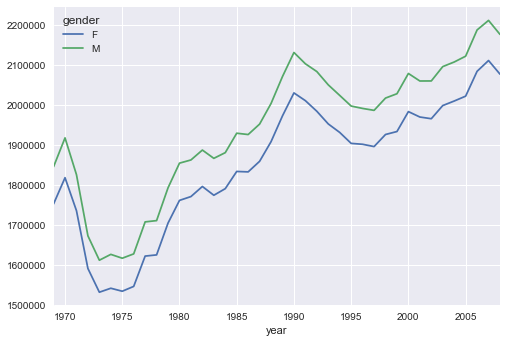

In [44]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
# pivot table is very easly plot with function .plot()

In [45]:
# Queries
# let's see if there is a relationship between day of the week and birth

# Problems: our data have nulls and entry mistakes
# we can sort the data and move away the extremeties (very common cleaning technique)
quartiles = np.percentile(births['births'],[25,20,75])

In [46]:
# to remove all outliers gaussian interquantile range
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [47]:
births['day']= births['day'].astype(int)

In [49]:
# births.index = pd.to_datetime(1000*births.year+100*births.month+births.day, format='%Y%m%d')